In [31]:
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt

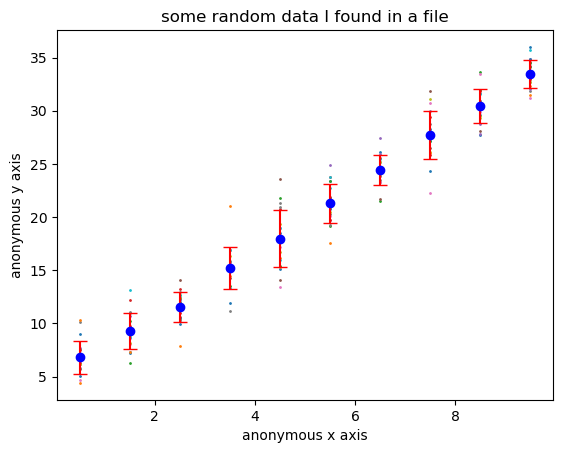

In [114]:
#Python task #1 read in data and get statistics
data_file_path = '/d/scratch/ASTR5160/week13/line.data'
y_vals = np.loadtxt(data_file_path)
x_vals = np.linspace(0.5, 9.5, 10)
mean_y = [np.mean(y_vals[:,i]) for i in range(10)]
y_std = [np.std(y_vals[:,i]) for i in range(10)]
y_var = [np.var(y_vals[:,i]) for i in range(10)]
for i in range(20):
    plt.scatter(x_vals, y_vals[i], s = 1)
plt.errorbar(x_vals, mean_y, yerr=y_std, fmt='o', 
             color='blue', ecolor='red', capsize=5,
             label='Mean with std deviation')
plt.title('some random data I found in a file')
plt.xlabel('anonymous x axis')
plt.ylabel('anonymous y axis')
plt.show()
#TJ note this is plotting the standard deviation as the error bars not the variance, which is the square of the standard deviation


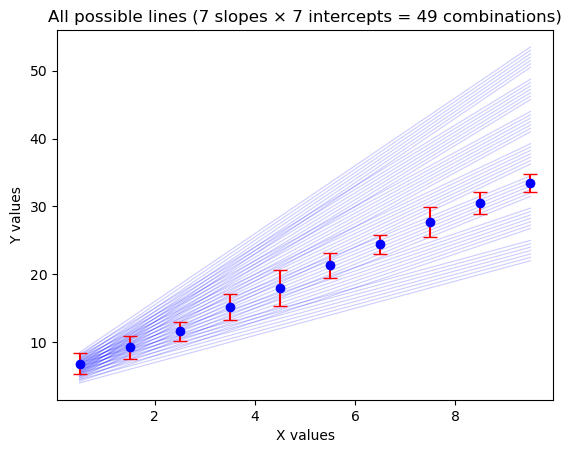

In [81]:
#Python task #2 guess at some fit lines
b_guesses = np.linspace(3, 6, 7) #TJ y-intercept guesses with spacing of 0.25
m_guesses = np.linspace(2, 5, 7) #TJ slope guesses with 0.25 spacing
num_combos = len(b_guesses)*len(m_guesses)
def get_expected_y_value(x, m, b):
    '''simple y = mx+b formula for a linear relationshoip'''
    return m*x + b
for b in b_guesses:
    for m in m_guesses:
        y_pred = get_expected_y_value(x_vals, m, b)
        plt.plot(x_vals, y_pred, 'b-', alpha=0.2, linewidth=0.8)

plt.errorbar(x_vals, mean_y, yerr=y_std, fmt='o', 
             color='blue', ecolor='red', capsize=5,
             label='Mean with std deviation')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title(f'All possible lines ({len(m_guesses)} slopes × {len(b_guesses)} intercepts = {len(m_guesses)*len(b_guesses)} combinations)')
plt.show()

In [112]:
#Python task #3 create grid of values and associated chi-squared values

x_vals = np.array(x_vals) #TJ convert to numpy array for easier indexing
mean_y = np.array(mean_y)
y_std = np.array(y_std)

M_grid, B_grid = np.meshgrid(m_guesses, b_guesses) #TJ create grid of combinations of guessed values
chi2_grid = np.zeros_like(M_grid) #TJ initialize grid of chi squared values
#TJ the ... notation ensures the arrays have the proper shape and size for vector multiplication
#TJ note this could be done more clearly with a for loop within a for loop "for i in range(len(b_guesses)): for j in range(len(m_guesses)): do thing
#TJ but this approach is much faster for very large grids
expected_y_grid = M[..., None] * x_vals + B[..., None] #TJ create grid of expected y_values for all the combinations of guesses
residuals = (mean_y - expected_y_grid) / y_std #TJ this is the grid of E-O/sigma, we still need to square these values
chi2_grid = np.sum(residuals**2, axis=-1) #TJ sum over the axis that ISNT the different guesses, it will be the last one
chi2_grid #TJ show the grid... it doesnt look pretty, but its there

array([[2.12044701e+02, 7.97089853e+01, 1.24591333e+01, 1.02951453e+01,
        7.32170211e+01, 2.01224761e+02, 3.94318365e+02],
       [1.87757805e+02, 6.47172497e+01, 6.76255861e+00, 1.38937315e+01,
        8.61107683e+01, 2.23413669e+02, 4.25802434e+02],
       [1.65287437e+02, 5.15420432e+01, 2.88251307e+00, 1.93088469e+01,
        1.00821045e+02, 2.47419106e+02, 4.59103032e+02],
       [1.44633599e+02, 4.01833659e+01, 8.18996720e-01, 2.65404914e+01,
        1.17347850e+02, 2.73241073e+02, 4.94220159e+02],
       [1.25796290e+02, 3.06412178e+01, 5.72009550e-01, 3.55886652e+01,
        1.35691185e+02, 3.00879568e+02, 5.31153816e+02],
       [1.08775510e+02, 2.29155989e+01, 2.14155156e+00, 4.64533681e+01,
        1.55851049e+02, 3.30334593e+02, 5.69904001e+02],
       [9.35712595e+01, 1.70065092e+01, 5.52762276e+00, 5.91346002e+01,
        1.77827442e+02, 3.61606147e+02, 6.10470716e+02]])

The best m and b values were determined to be m = 3.0 and b = 5.0


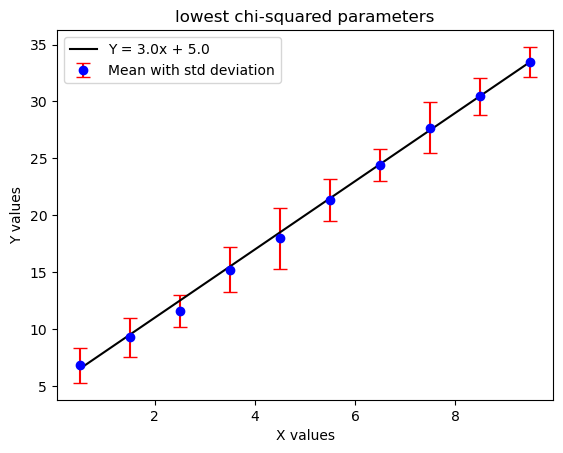

In [109]:
#Python task #4 find best parameters and plot

b_idx, m_idx = np.where(chi2_grid == np.min(chi2_grid)) 
#TJ I think that actually searches the whole array twice, which I feel like is a redundancy that could be avoided, but idk how
print(f'The best m and b values were determined to be m = {m_guesses[m_idx][0]} and b = {b_guesses[b_idx][0]}')
plt.errorbar(x_vals, mean_y, yerr=y_std, fmt='o', 
             color='blue', ecolor='red', capsize=5,
             label='Mean with std deviation')
plt.plot(x_vals, get_expected_y_value(x_vals, m_guesses[m_idx], b_guesses[b_idx]), color = 'black', label = f'Y = {m_guesses[m_idx][0]}x + {b_guesses[b_idx][0]}')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title(f'lowest chi-squared parameters')
plt.legend()
plt.show()

In [113]:
#TJ I dont have time right now to do the rest of the black tasks...